In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.760063, -47.871154)

    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("../data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] < 35)] 

print(df_nearest_stations)

    REGI?O: UF:           ESTAC?O: CODIGO (WMO):     LATITUDE:    LONGITUDE:  \
141      CO  DF         BRAZLANDIA          A042  -15.59972221   -48.1311111   
233      CO  DF    AGUAS EMENDADAS          A045    -15.596491    -47.625801   
239      CO  DF  GAMA (PONTE ALTA)          A046  -15.93527777  -48.13749999   
442      CO  DF           BRASILIA          A001    -15.789343    -47.925756   

    ALTITUDE:                                            Arquivo  Distancia  
141    1143.0  INMET_CO_DF_A042_BRAZLANDIA_01-01-2019_A_31-12...  33.036886  
233   1030.36  INMET_CO_DF_A045_AGUAS EMENDADAS_01-01-2019_A_...  31.928860  
239     990.0  INMET_CO_DF_A046_GAMA (PONTE ALTA)_01-01-2019_...  34.494431  
442   1160.96  INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2...   6.688014  


In [3]:
yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_weather_data.rename(columns={'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_weather_data.rename(columns={'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_weather_data.rename(columns={'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_weather_data.rename(columns={'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_weather_data.rename(columns={'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'../data/cleaned_data/2024_cleaned/{filename.replace("2019", "2024")}', decimal=".", sep=";")
    df_weather_data.rename(columns={'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
    df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)


df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2019/01/01,0000 UTC,0.0,888.4,888.4,887.7,NaN,18.7,17.4,19.4,18.6,17.4,17.1,92.0,87.0,92.0,329.0,5.3,1.2
1,2019/01/01,0100 UTC,0.2,889.0,889.0,888.4,NaN,19.0,17.5,19.0,18.5,17.5,17.3,93.0,91.0,91.0,67.0,3.3,2.0
2,2019/01/01,0200 UTC,0.2,889.2,889.2,889.0,NaN,18.9,17.4,19.0,18.8,17.5,17.4,92.0,91.0,91.0,37.0,3.3,1.4
3,2019/01/01,0300 UTC,0.0,888.6,889.2,888.6,NaN,18.6,16.8,19.0,18.6,17.4,16.7,91.0,87.0,89.0,24.0,2.6,0.9
4,2019/01/01,0400 UTC,0.0,887.9,888.6,887.9,NaN,18.6,17.2,18.7,18.4,17.3,16.8,93.0,89.0,91.0,21.0,2.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210427,2024/12/31,1900 UTC,0.0,884.5,885.0,884.5,2061.5,26.3,18.2,26.7,25.4,18.9,16.6,65.0,56.0,61.0,351.0,6.3,3.3
210428,2024/12/31,2000 UTC,0.0,884.1,884.5,884.0,1940.0,26.2,17.7,26.7,25.8,18.4,17.2,62.0,58.0,59.0,348.0,7.4,3.7
210429,2024/12/31,2100 UTC,0.0,884.3,884.4,884.1,877.0,21.7,18.9,26.3,21.6,19.0,17.3,84.0,59.0,84.0,3.0,12.1,3.4
210430,2024/12/31,2200 UTC,0.0,884.5,884.5,884.1,109.8,21.3,19.4,21.8,21.2,19.4,18.8,89.0,84.0,89.0,356.0,5.3,2.5


<class 'pandas.core.frame.DataFrame'>
Index: 210432 entries, 0 to 210431
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Data                                                   210432 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       206648 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  207298 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        207246 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       207244 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                111276 non-null  float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           207331 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   207322

/tmp/ipykernel_1387473/143769452.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_precipitation_by_month = df_sorted.resample("M").mean()


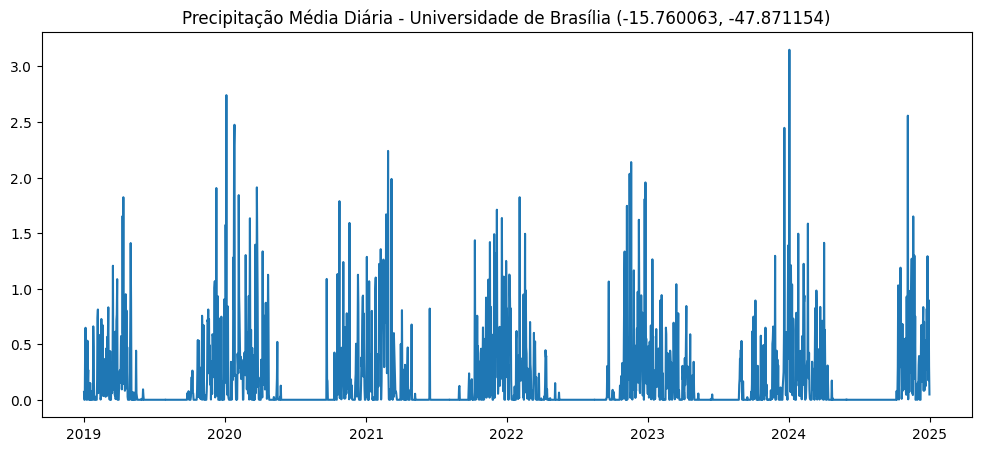

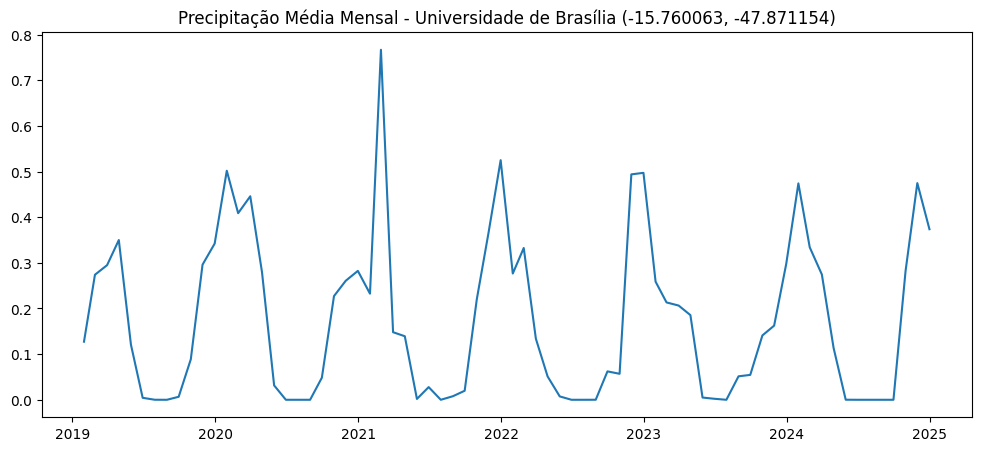

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (KJ/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, HORARIA (%)                      0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                     0
VENTO, RAJADA MAXIMA (m/s)                               0
VENTO, VELOCIDADE HORARIA (m/s)                         

In [4]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

forecast_parameter = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted.set_index('Data', inplace=True)
df_avarage_precipitation_by_day = df_sorted.resample("D").mean()
df_avarage_precipitation_by_month = df_sorted.resample("M").mean()

print(df_avarage_precipitation_by_day)

#Teste
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_precipitation_by_day[forecast_parameter], label='Previsão')
plt.title('Precipitação Média Diária - Universidade de Brasília (-15.760063, -47.871154)')
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_precipitation_by_month[forecast_parameter], label='Previsão')
plt.title('Precipitação Média Mensal - Universidade de Brasília (-15.760063, -47.871154)')
plt.show()

# Verificar se há valores nulos
print(df_avarage_precipitation_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_precipitation_by_day.ffill()
df_not_null_values_month = df_avarage_precipitation_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

print(df_training)

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

<Figure size 1000x500 with 0 Axes>

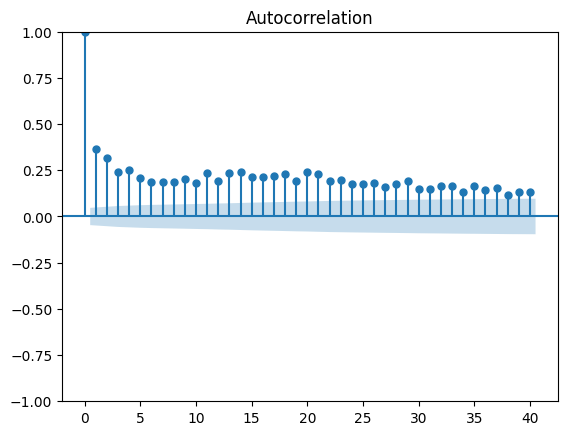

<Figure size 1000x500 with 0 Axes>

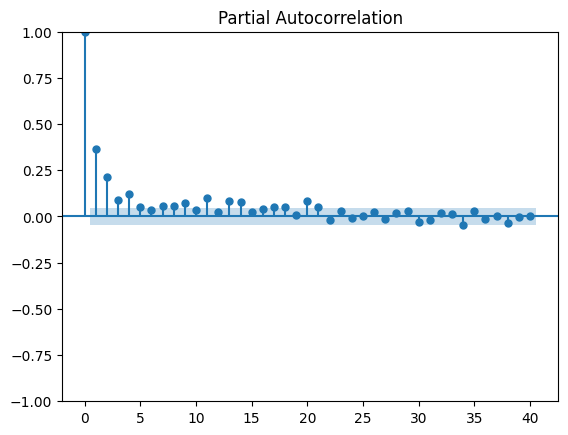

/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/juliababa/.local/lib/python3.10

    p  d  q          AIC
49  3  0  1   773.461571
19  1  0  3   773.748203
50  3  0  2   773.983782
35  2  0  3   775.689432
34  2  0  2   776.400451
.. .. .. ..          ...
44  2  3  0  3456.130276
8   0  2  0  3500.813362
13  0  3  1  3509.282911
28  1  3  0  4104.885133
12  0  3  0  5606.136572

[64 rows x 4 columns]
\begin{tabular}{rrrr}
\toprule
p & d & q & AIC \\
\midrule
3 & 0 & 1 & 773.46 \\
1 & 0 & 3 & 773.75 \\
3 & 0 & 2 & 773.98 \\
2 & 0 & 3 & 775.69 \\
2 & 0 & 2 & 776.40 \\
2 & 1 & 1 & 780.61 \\
0 & 1 & 3 & 781.18 \\
2 & 1 & 2 & 781.31 \\
3 & 1 & 3 & 781.31 \\
3 & 1 & 1 & 782.13 \\
2 & 0 & 1 & 782.50 \\
2 & 1 & 3 & 782.97 \\
1 & 1 & 3 & 783.11 \\
3 & 1 & 2 & 783.84 \\
1 & 0 & 2 & 788.27 \\
1 & 1 & 1 & 790.47 \\
0 & 1 & 2 & 797.03 \\
3 & 2 & 3 & 800.50 \\
3 & 2 & 2 & 801.24 \\
1 & 2 & 2 & 805.53 \\
2 & 2 & 2 & 805.63 \\
2 & 2 & 3 & 809.49 \\
0 & 2 & 3 & 812.01 \\
1 & 0 & 1 & 812.11 \\
3 & 0 & 3 & 816.06 \\
0 & 1 & 1 & 825.92 \\
1 & 1 & 2 & 828.25 \\
0 & 2 & 2 & 840.54 \\
1 

In [5]:
# Seleciona a série diária
series_day = df_training[forecast_parameter]

# Gráficos de Autocorrelação e Autocorrelação Parcial da série diferenciada
plt.figure(figsize=(10, 5))
plot_acf(series_day, lags=40)
plt.title('Autocorrelation')
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(series_day, lags=40, method='ywm')
plt.title('Partial Autocorrelation')
plt.show()

import itertools

# Supondo que sua série seja 'series'
# Defina os ranges dos hiperparâmetros
p = range(0, 4)
d = range(0, 4)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None

results = []

for order in pdq:
    try:
        model = ARIMA(series_day, order=order)
        model_fit = model.fit()
        aic = model_fit.aic
        results.append({'p': order[0], 'd': order[1], 'q': order[2], 'AIC': aic})
        if aic < best_aic:
            best_aic = aic
            best_order = order
    except Exception as e:
        results.append({'p': order[0], 'd': order[1], 'q': order[2], 'AIC': None})
        continue

# Criar DataFrame
df_grid = pd.DataFrame(results)
df_grid = df_grid.dropna(subset=['AIC'])
df_grid = df_grid.sort_values(by='AIC')

# Imprimir todas as configurações ordenadas pelo menor AIC
print(df_grid)

# Exportar TODA a tabela para LaTeX
print(df_grid.to_latex(index=False, float_format="%.2f"))

print(f"Melhor configuração (p,d,q): {best_order} com AIC={best_aic}")


/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE: 0.1443603880077697
RMSE: 0.37994787538262365
SMAPE: 145.79938129049316


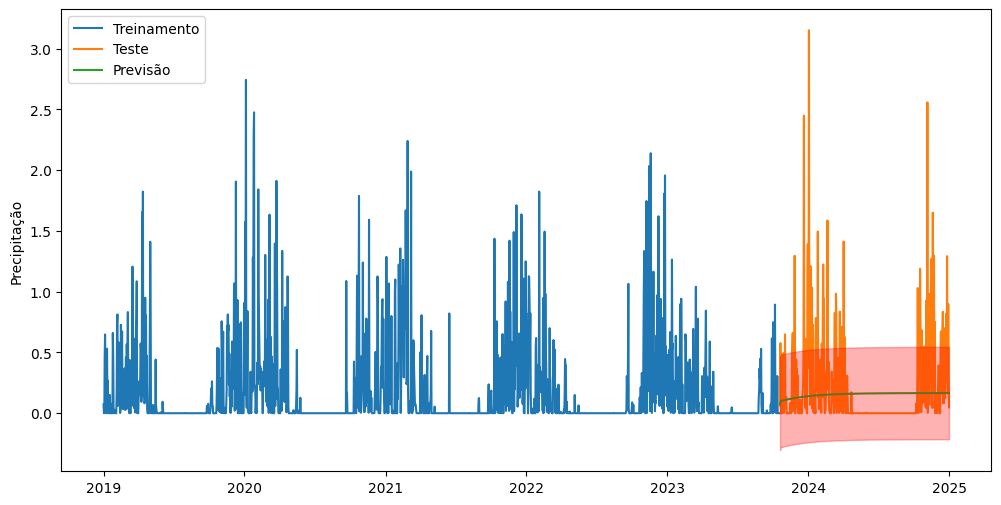

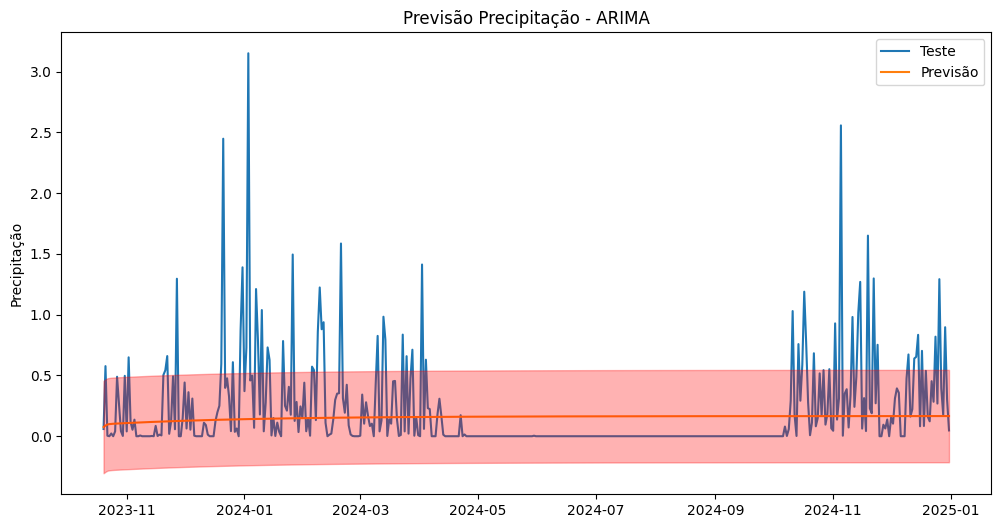

In [6]:
# Ajuste do modelo ARIMA
model = ARIMA(df_training[forecast_parameter], order=(3, 0, 1))
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test))

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Precipitação')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

# Salva o gráfico como arquivo de imagem
#plt.savefig('forecast.png')

plt.figure(figsize=(12,6))
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Precipitação')
plt.legend(loc='upper left')
plt.title(f"Previsão Precipitação - ARIMA")
plt.legend()
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(df_test[forecast_parameter], forecast)
print(f"SMAPE: {smape_value}")


/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MSE: 0.1443603880077697
RMSE: 0.37994787538262365
SMAPE: 145.80%


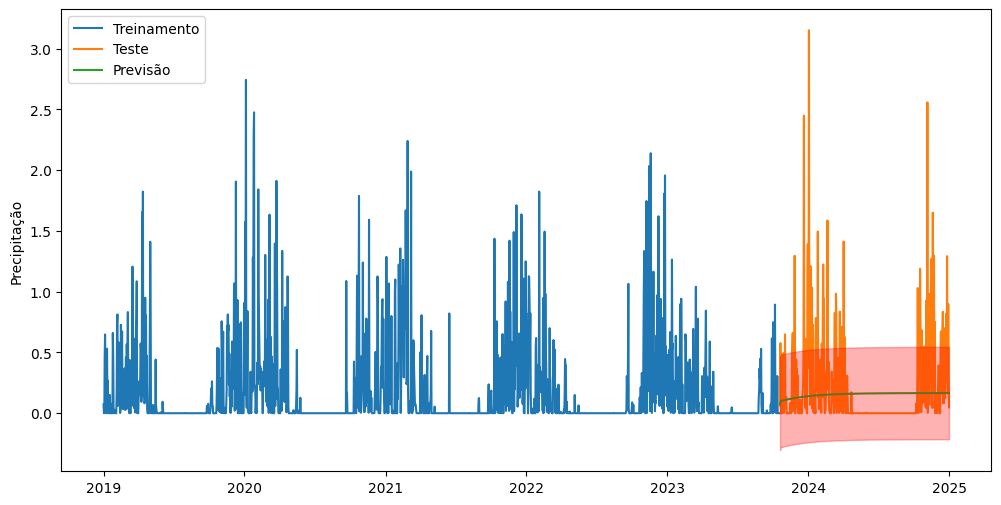

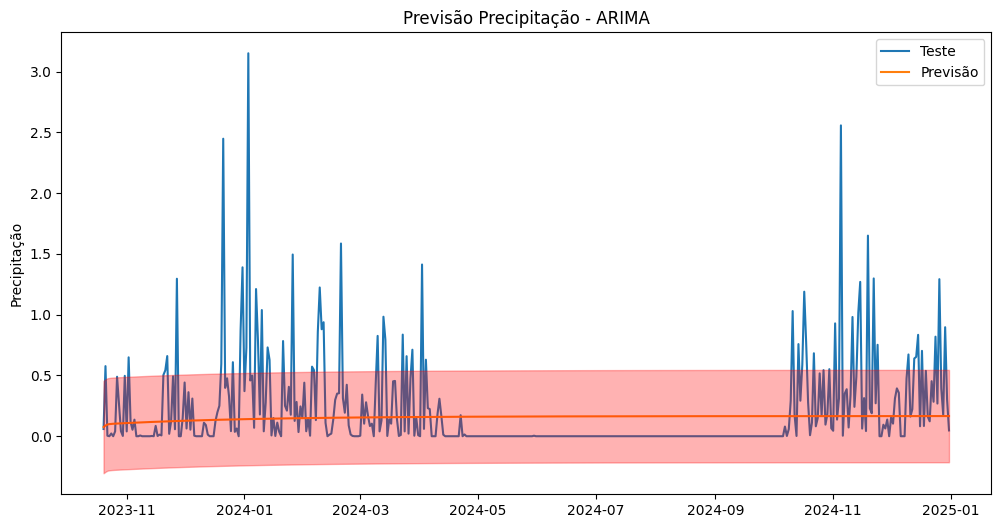

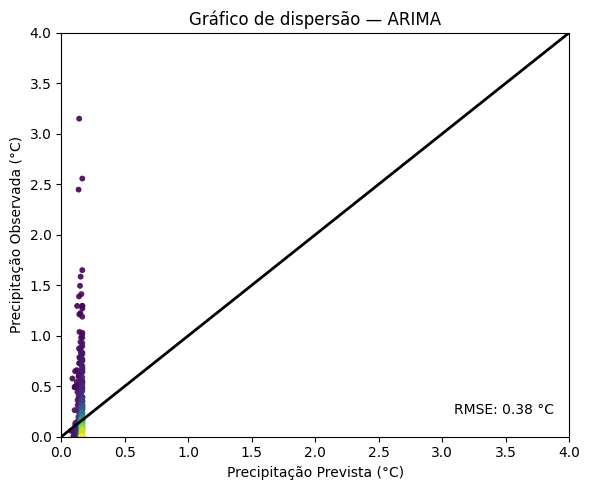

In [7]:
# Ajuste do modelo ARIMA
model = ARIMA(df_training[forecast_parameter], order=(3, 0, 1))
model_fit = model.fit()

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test))

# Visualização das previsões (séries)
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Precipitação')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

plt.figure(figsize=(12,6))
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Precipitação')
plt.legend(loc='upper left')
plt.title("Previsão Precipitação - ARIMA")
plt.legend()
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

# sMAPE
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(df_test[forecast_parameter], forecast)
print(f"SMAPE: {smape_value:.2f}%")

# ---------------- Gráfico de dispersão (Observado × Previsto) ----------------
y_true = df_test[forecast_parameter].to_numpy()
y_pred = np.asarray(forecast).ravel()

# Limites e linha 1:1
vmin = float(np.floor(min(y_true.min(), y_pred.min())))
vmax = float(np.ceil(max(y_true.max(), y_pred.max())))

fig, ax = plt.subplots(figsize=(6,5))

# Dispersão com densidade (kde -> fallback hexbin)
try:
    from scipy.stats import gaussian_kde
    xy = np.vstack([y_pred, y_true])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    ax.scatter(y_pred[idx], y_true[idx], c=z[idx], s=18, alpha=0.9,
               cmap="viridis", edgecolor="none")
except Exception:
    hb = ax.hexbin(y_pred, y_true, gridsize=35,
                   extent=[vmin, vmax, vmin, vmax],
                   cmap="viridis", mincnt=1)
    fig.colorbar(hb, ax=ax, label="Densidade")

ax.plot([vmin, vmax], [vmin, vmax], 'k-', lw=2)  # linha x=y
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.set_xlabel("Precipitação Prevista (°C)")
ax.set_ylabel("Precipitação Observada (°C)")
ax.set_title("Gráfico de dispersão — ARIMA")
ax.text(0.97, 0.05, f"RMSE: {rmse:.2f} °C", ha="right", va="bottom",
        transform=ax.transAxes, fontsize=10)

plt.tight_layout()
plt.show()


/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67901D-01    |proj g|=  1.06115D+00

At iterate    5    f= -3.85523D-01    |proj g|=  6.32882D-01

At iterate   10    f= -4.12668D-01    |proj g|=  8.90152D-02

At iterate   15    f= -4.42687D-01    |proj g|=  1.86643D-02

At iterate   20    f= -4.48544D-01    |proj g|=  8.15153D-02

At iterate   25    f= -4.49304D-01    |proj g|=  8.04011D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     43      1     0     0   

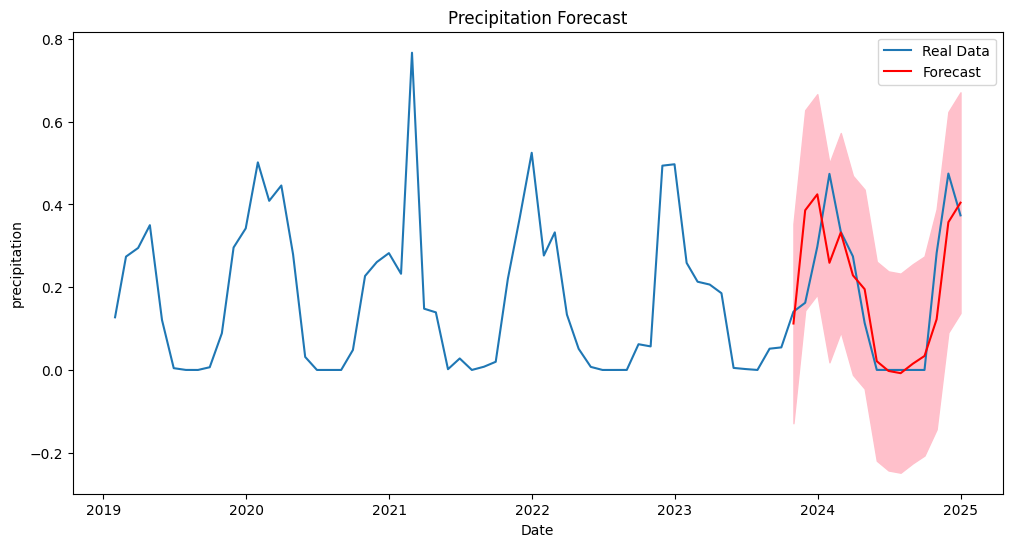

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(df_training_month[forecast_parameter], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecast future values
forecast_periods =  int(len(df_test_month[forecast_parameter]))  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_not_null_values_month[forecast_parameter], label='Real Data')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Precipitation Forecast")
plt.xlabel("Date")
plt.ylabel("precipitation")
plt.legend()
plt.show()




MSE: 0.11832681013895757
RMSE: 0.3439866423844937
Data
2023-10-20    0.059341
2023-10-21    0.576596
2023-10-22    0.004211
2023-10-23    0.000000
2023-10-24    0.022472
                ...   
2024-12-27    0.393182
2024-12-28    0.175824
2024-12-29    0.896629
2024-12-30    0.302174
2024-12-31    0.047826
Freq: D, Name: PRECIPITAÇÃO TOTAL, HORÁRIO (mm), Length: 439, dtype: float64
SMAPE: 143.0177323718801
Arquivo salvo em: /home/juliababa/tcc/src/forecast_arima_fourier_precipitacao.csv
         data  precipitacao_observada  precipitacao_prevista
0  2023-10-20                   0.059                  0.127
1  2023-10-21                   0.577                  0.158
2  2023-10-22                   0.004                  0.183
3  2023-10-23                   0.000                  0.195
4  2023-10-24                   0.022                  0.208


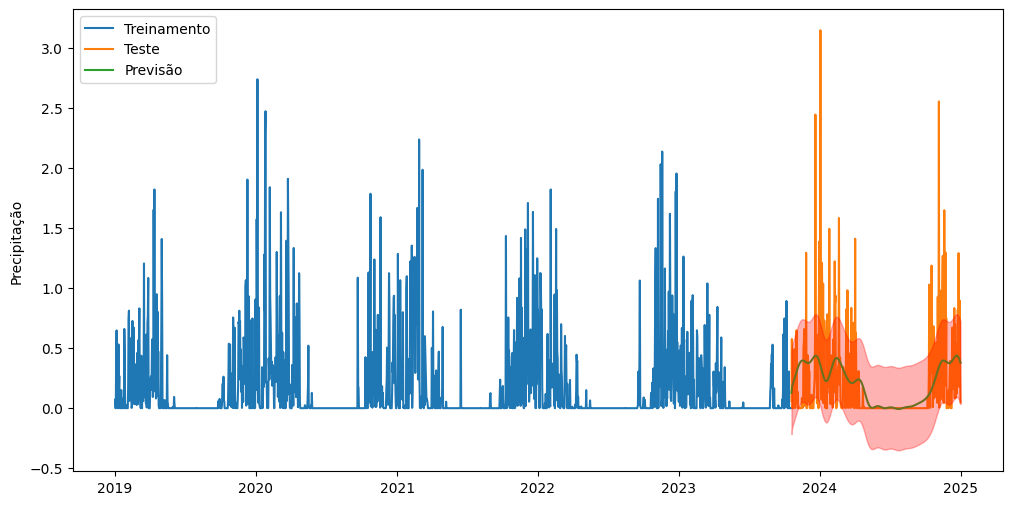

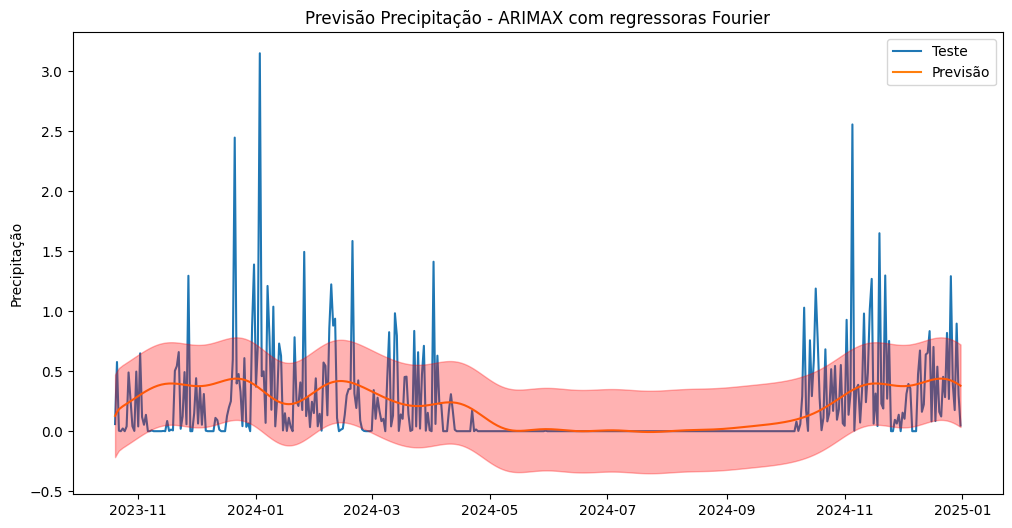

In [9]:
n = len(df_training[forecast_parameter])  # Number of data points
t = np.arange(n)
seasonality = 365  

# Create Fourier terms
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

num_fourier_terms = 10
fourier_terms = create_fourier_terms(t, seasonality, num_fourier_terms)

# Fit the ARIMA model using arima with Fourier terms as exogenous variables
model = ARIMA(df_training[forecast_parameter],exog=fourier_terms[:n], order=(3,0,1))
model_fit = model.fit()

# Forecast future values with the fitted model
forecast_exog = create_fourier_terms(np.arange(n, n + len(df_test)), seasonality, num_fourier_terms)

# Get the forecast for the future steps with exogenous variables
forecast_df = pd.DataFrame(forecast_exog, columns=[f'Fourier_{i+1}' for i in range(num_fourier_terms * 2)])

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test), exog=forecast_df)

# Visualização das previsões
plt.figure(figsize=(12,6))
plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Precipitação')
plt.legend(loc='upper left')

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)

plt.figure(figsize=(12,6))
plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
plt.plot(df_test.index, forecast, label='Previsão')
plt.ylabel('Precipitação')
plt.legend(loc='upper left')
plt.title(f"Previsão Precipitação - ARIMAX com regressoras Fourier")
plt.legend()
plt.fill_between(df_test.index, (forecast-rmse), (forecast+rmse), alpha=.3, color='r', zorder=20)


print(df_test[forecast_parameter])

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(df_test[forecast_parameter], forecast)
print(f"SMAPE: {smape_value}")

#############################################

from pathlib import Path

idx = forecast.index
try:
    idx = idx.tz_localize(None)
except Exception:
    pass

# Monta o DataFrame de saída
df_out = pd.DataFrame({
    "data": pd.to_datetime(idx).strftime("%Y-%m-%d"),
    "precipitacao_observada": df_test.loc[forecast.index, forecast_parameter].to_numpy(),
    "precipitacao_prevista": forecast.to_numpy()
})

# (Opcional) arredondar casas decimais
df_out["precipitacao_observada"] = df_out["precipitacao_observada"].round(3)
df_out["precipitacao_prevista"] = df_out["precipitacao_prevista"].round(3)

# Caminho do arquivo
saida = Path("forecast_arima_fourier_precipitacao.csv")

# Salva com separador ';' e BOM para abrir bem no Excel
df_out.to_csv(saida, sep=";", index=False, encoding="utf-8-sig")

print(f"Arquivo salvo em: {saida.resolve()}")
print(df_out.head())



MSE: 0.11853232878107647
RMSE: 0.34428524333911914
SMAPE: 143.13%


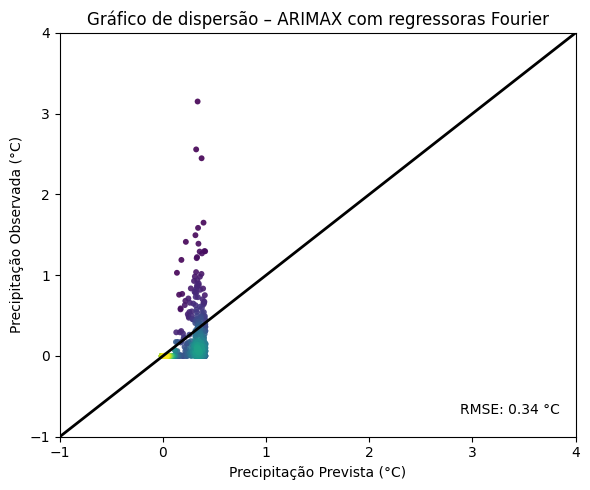

In [45]:
# --- ARIMAX + Fourier ---
n = len(df_training[forecast_parameter])  # Number of data points
t = np.arange(n)
seasonality = 365  

# Create Fourier terms
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

num_fourier_terms = 4
fourier_terms = create_fourier_terms(t, seasonality, num_fourier_terms)

# Fit the ARIMA model using arima with Fourier terms as exogenous variables
model = ARIMA(df_training[forecast_parameter], exog=fourier_terms[:n], order=(3,0,1))
model_fit = model.fit()

# Forecast future values with the fitted model
forecast_exog = create_fourier_terms(np.arange(n, n + len(df_test)), seasonality, num_fourier_terms)

# Get the forecast for the future steps with exogenous variables
forecast_df = pd.DataFrame(forecast_exog, columns=[f'Fourier_{i+1}' for i in range(num_fourier_terms * 2)])

# Fazer previsões
forecast = model_fit.forecast(steps=len(df_test), exog=forecast_df)

# Cálculo erro quadrático
mse = mean_squared_error(df_test[forecast_parameter], forecast)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# --- SMAPE ---
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(df_test[forecast_parameter], forecast)
print(f"SMAPE: {smape_value:.2f}%")

# --- PARITY PLOT (Observado × Previsto) para UMA estação ---
y_true = df_test[forecast_parameter].to_numpy()
y_pred = np.asarray(forecast).ravel()  # garante 1D e mesma ordem

# limites para a linha 1:1
vmin = float(np.floor(min(y_true.min(), y_pred.min())))
vmax = float(np.ceil(max(y_true.max(), y_pred.max())))

fig, ax = plt.subplots(figsize=(6,5))

# Dispersão com densidade (usa gaussian_kde se disponível; senão, hexbin)
try:
    from scipy.stats import gaussian_kde
    xy = np.vstack([y_pred, y_true])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    ax.scatter(y_pred[idx], y_true[idx], c=z[idx], s=18, alpha=0.9,
               cmap="viridis", edgecolor="none")
except Exception:
    hb = ax.hexbin(y_pred, y_true, gridsize=35,
                   extent=[vmin, vmax, vmin, vmax],
                   cmap="viridis", mincnt=1)
    fig.colorbar(hb, ax=ax, label="Densidade")

# Linha 1:1
ax.plot([vmin, vmax], [vmin, vmax], 'k-', lw=2)

# Estética
ax.set_xlim(vmin, vmax)
ax.set_ylim(vmin, vmax)
ax.set_xlabel("Precipitação Prevista (°C)")
ax.set_ylabel("Precipitação Observada (°C)")
ax.set_title("Gráfico de dispersão – ARIMAX com regressoras Fourier")  # troque pelo nome da estação se quiser
ax.text(0.97, 0.05, f"RMSE: {rmse:.2f} °C",
        ha="right", va="bottom", transform=ax.transAxes)

plt.tight_layout()
plt.show()


In [46]:
df_training.corr()[forecast_parameter]

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         1.000000
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   -0.353218
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)         -0.350264
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)        -0.358639
RADIACAO GLOBAL (KJ/m²)                                 -0.128070
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)            -0.100110
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0.460178
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)              -0.128643
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)              -0.059799
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0.453798
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0.465500
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0.508724
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0.523396
UMIDADE RELATIVA DO AR, HORARIA (%)                      0.519664
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                     0.394342
VENTO, RAJ

/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE bruto: 0.347 | debias (ME): 0.348 | calib linear: 0.347
MSE: 0.12083982024145135
RMSE: 0.3476202241548258
sMAPE: 144.3757359572704


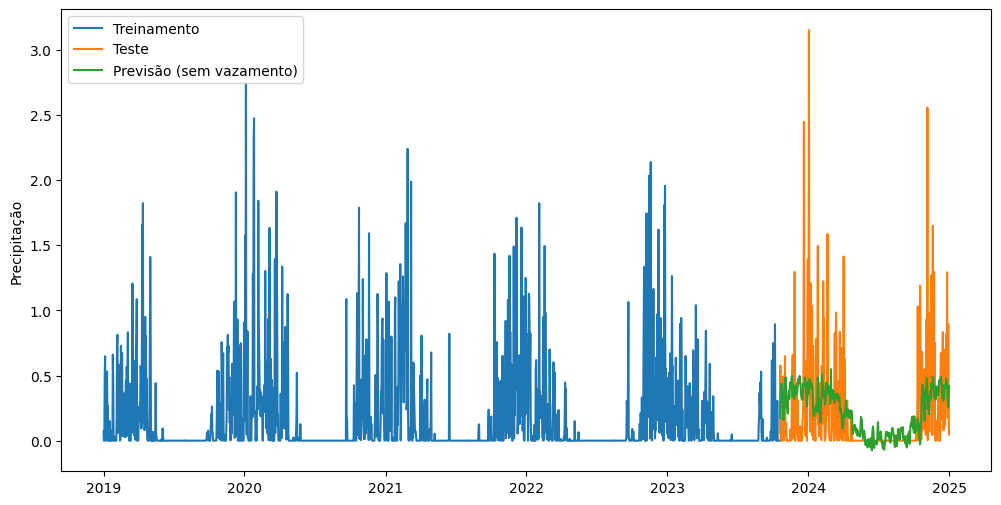

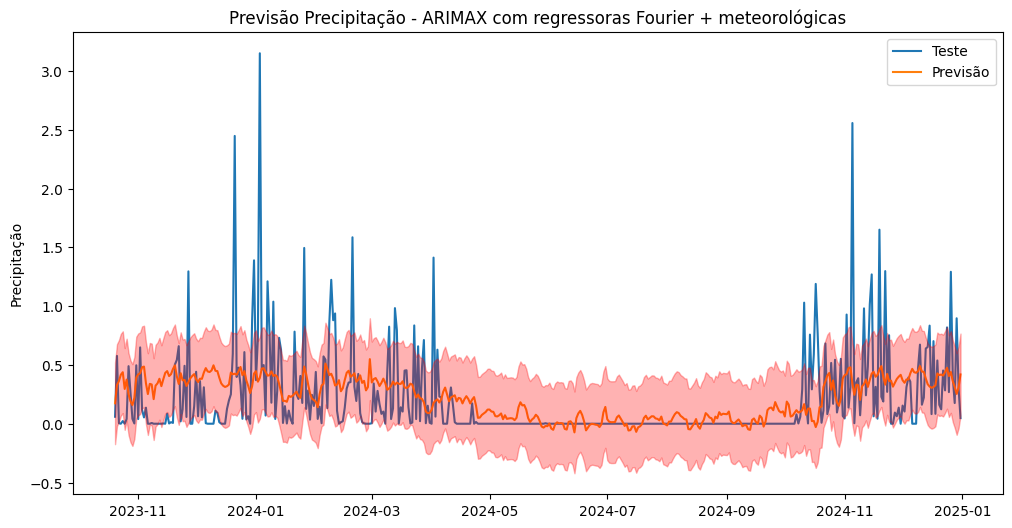

In [47]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm

from pmdarima import auto_arima

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

def clean_data(dataframe):
    df_cleaned = dataframe.drop(columns=['Hora UTC'])
    df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

    df_sorted = df_cleaned.sort_values(by='Data', ascending=True)
    df_sorted.set_index('Data', inplace=True)
    df_avarage_precipitation_by_day = df_sorted.resample("D").mean()
    df_not_null_values_day = df_avarage_precipitation_by_day.ffill()

    return df_not_null_values_day

def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))


def get_forecast_test_graph(df_test, forecast, forecast_parameter, ax):
    import numpy as np
    from scipy import stats
    from sklearn.metrics import mean_squared_error
    import seaborn as sns

    values = np.vstack([df_test[forecast_parameter], forecast])
    kernel = stats.gaussian_kde(values)(values)

    # Scatterplot com seaborn no eixo fornecido
    sns.scatterplot(
        x=df_test[forecast_parameter],
        y=forecast,
        hue=kernel,
        palette="viridis",
        ax=ax,
        legend=False
    )

    mse = mean_squared_error(df_test[forecast_parameter], forecast)
    rmse = mse**0.5

    # Linha de referência x=y
    ax.plot(df_test[forecast_parameter], df_test[forecast_parameter], color='black', linewidth=1.0)

    # Texto RMSE
    ax.text(0.95, 0.05, f'RMSE: {rmse:.2f} °C', ha='right', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.set_ylabel('Precipitação Observada (°C)')
    ax.set_xlabel('Precipitação Prevista (°C)')

def arima_forecast_with_fourier_terms_exog(df_training, df_test, forecast_parameter, title, lag_days=365):
    # ---------- Setup ----------
    n = len(df_training[forecast_parameter])
    t = np.arange(n)
    seasonality = 365
    num_fourier_terms = 4

    exog_vars = [
        "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
        "TEMPERATURA DO PONTO DE ORVALHO (°C)",
        "UMIDADE RELATIVA DO AR, HORARIA (%)"
    ]

    # ---------- Fourier + EXÓGENAS do TREINO ----------
    fourier_terms_train = create_fourier_terms(t, seasonality, num_fourier_terms)
    X_train_extra = df_training[exog_vars].values
    X_train_final = np.hstack([X_train_extra, fourier_terms_train[:n]])

     # ---------- EXÓGENAS do TESTE (climatologia por data exata) ----------
    # perfil por (mês, dia): média de TODOS os anos do TREINO
    prof = df_training.copy()
    prof["__mm__"] = prof.index.month
    prof["__dd__"] = prof.index.day
    profile_mmdd = (
        prof.groupby(["__mm__", "__dd__"])[exog_vars]
        .mean()  # pode trocar por .median() se houver outliers
    )

    # índice (mês, dia) do TESTE na mesma ordem
    test_mm = pd.Index(df_test.index.month, name="__mm__")
    test_dd = pd.Index(df_test.index.day, name="__dd__")
    test_mmdd = pd.MultiIndex.from_arrays([test_mm, test_dd], names=["__mm__", "__dd__"])

    # mapeia (mês, dia) do TESTE -> média climatológica do TREINO
    X_test_extra_df = profile_mmdd.reindex(test_mmdd)

    # --- Tratamento de Feb 29 (se o treino não tiver 29/02) ---
    # fallback 1: média de (28/02) e (01/03)
    missing_rows = X_test_extra_df.isna().any(axis=1)
    if missing_rows.any():
        feb28 = profile_mmdd.reindex(pd.MultiIndex.from_arrays(
            [pd.Index([2], name="__mm__"), pd.Index([28], name="__dd__")]
        ))
        mar01 = profile_mmdd.reindex(pd.MultiIndex.from_arrays(
            [pd.Index([3], name="__mm__"), pd.Index([1], name="__dd__")]
        ))
        neigh_avg = (feb28.values + mar01.values) / 2.0 if (not feb28.isna().any().any() and not mar01.isna().any().any()) else None
        if neigh_avg is not None:
            X_test_extra_df.loc[missing_rows, exog_vars] = neigh_avg

    # fallback 2: perfil por dia-do-ano (módulo 365) do TREINO
    if X_test_extra_df.isna().any().any():
        prof_doy = df_training.copy()
        prof_doy["__doy__"] = prof_doy.index.dayofyear
        profile_doy = prof_doy.groupby("__doy__")[exog_vars].mean()
        test_doy = ((df_test.index.dayofyear - 1) % 365) + 1
        X_fallback_doy = profile_doy.reindex(test_doy).to_numpy()
        X_test_extra_df = X_test_extra_df.fillna(pd.DataFrame(
            X_fallback_doy, index=X_test_extra_df.index, columns=exog_vars
        ))

    # fallback 3: qualquer NaN remanescente -> média da coluna (não usa futuro)
    if X_test_extra_df.isna().any().any():
        for col in exog_vars:
            X_test_extra_df[col].fillna(X_test_extra_df[col].mean(), inplace=True)

    X_test_extra = X_test_extra_df.to_numpy()  # shape = (len(df_test), len(exog_vars))

    # ---------- Fourier para o horizonte (mesmo length do df_test) ----------
    forecast_steps = len(df_test)
    fourier_terms_test = create_fourier_terms(
        np.arange(n, n + forecast_steps),
        seasonality,
        num_fourier_terms
    )
    X_test_final = np.hstack([X_test_extra, fourier_terms_test])

    # ---------- Ajuste e previsão ----------
    model = ARIMA(
        df_training[forecast_parameter],
        exog=X_train_final,
        order=(3,0,1),
        trend='ct'
    )
    model_fit = model.fit()

    forecast_vals = model_fit.forecast(steps=forecast_steps, exog=X_test_final)

    cal = debias_with_calibration(model_fit, df_training, forecast_parameter, X_train_final, forecast_vals, calib_days=60)
    rmse_raw = mean_squared_error(df_test[forecast_parameter], forecast_vals)**0.5
    rmse_bias = mean_squared_error(df_test[forecast_parameter], cal["forecast_bias_fixed"])**0.5
    rmse_lin  = mean_squared_error(df_test[forecast_parameter], cal["forecast_linear_cal"])**0.5

    print(f"RMSE bruto: {rmse_raw:.3f} | debias (ME): {rmse_bias:.3f} | calib linear: {rmse_lin:.3f}")

    forecast_corrected = cal["forecast_bias_fixed"]

    # ---------- Visual ----------
    plt.figure(figsize=(12, 6))
    plt.plot(df_training.index, df_training[forecast_parameter], label='Treinamento')
    plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
    plt.plot(df_test.index, forecast_corrected, label='Previsão (sem vazamento)')
    plt.ylabel('Precipitação')
    plt.legend(loc='upper left')

    # plt.figure(figsize=(12,6))
    # plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
    # plt.plot(forecast.index, forecast.values, label='Previsão')
    # # plt.fill_between(forecast.index, ci.iloc[:,0], ci.iloc[:,1], alpha=.25, color='r', zorder=20)
    # plt.ylabel('Precipitação (°C)')
    # plt.legend(loc='upper left')
    # plt.title(f"{title} — Período de Teste")
    # plt.tight_layout()
    # plt.show()

    mse = mean_squared_error(df_test[forecast_parameter], forecast_corrected)
    rmse = mse ** 0.5
    smape_value = smape(df_test[forecast_parameter], forecast_corrected)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'sMAPE: {smape_value}')

    plt.figure(figsize=(12,6))
    plt.plot(df_test.index, df_test[forecast_parameter], label='Teste')
    plt.plot(df_test.index, forecast_corrected, label='Previsão')
    plt.ylabel('Precipitação')
    plt.legend(loc='upper left')
    plt.title(f"Previsão Precipitação - ARIMAX com regressoras Fourier + meteorológicas")
    plt.legend()
    plt.fill_between(df_test.index, (forecast_corrected-rmse), (forecast_corrected+rmse), alpha=.3, color='r', zorder=20)


    return pd.Series(forecast_corrected, index=df_test.index, name='forecast')


def debias_with_calibration(model_fit, df_training, forecast_parameter, X_train_final, forecast_vals, calib_days=60):
    # 1) previsões 1-passo à frente na cauda do TREINO (janela de calibração)
    start = len(df_training) - calib_days
    pred_cal = model_fit.get_prediction(
        start=df_training.index[start],
        end=df_training.index[-1],
        exog=X_train_final[start:]
    ).predicted_mean
    y_cal = df_training[forecast_parameter].iloc[start:]

    # 2) medir viés (ME) e corrigir por deslocamento — recomendado em FPP3
    ME = (y_cal - pred_cal).mean()
    forecast_bias_fixed = forecast_vals + ME

    # 3) (opcional) correção linear completa (intercepto + inclinação)
    X = sm.add_constant(pred_cal.values)
    a, b = sm.OLS(y_cal.values, X).fit().params
    forecast_linear_cal = a + b * forecast_vals

    return {
        "ME": ME,
        "forecast_bias_fixed": forecast_bias_fixed,
        "a": a, "b": b,
        "forecast_linear_cal": forecast_linear_cal
    }

forecast_parameter = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'


forecast = arima_forecast_with_fourier_terms_exog(df_training, df_test, forecast_parameter, f'Previsão da Precipitação - ARIMAX com regressoras Fourier + meteorológicas')
# get_forecast_test_graph(df_tests[i], forecasts[i], forecast_parameter, ax=axes[i])
# axes[i].set_title(f'Estação {stations_name[i]}')


# df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE bruto: 0.347 | debias (ME): 0.348 | calib linear: 0.347
MSE: 0.12083982024145135
RMSE: 0.3476202241548258
sMAPE: 144.3757359572704


/home/juliababa/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


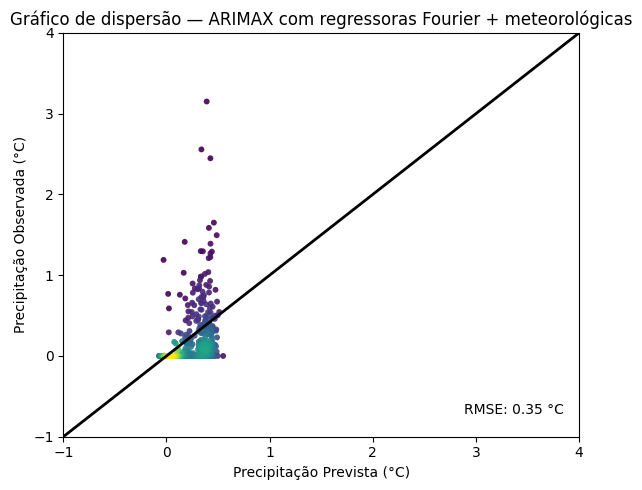

Arquivo salvo em: /home/juliababa/tcc/src/forecast_arima_fourier_exog_precipitacao.csv
         data  precipitacao_observada  precipitacao_prevista
0  2023-10-20                   0.059                  0.174
1  2023-10-21                   0.577                  0.329
2  2023-10-22                   0.004                  0.363
3  2023-10-23                   0.000                  0.417
4  2023-10-24                   0.022                  0.438


In [48]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.api as sm
from pmdarima import auto_arima

# ------------------------------------------------------------
# utilidades
# ------------------------------------------------------------
def clean_data(dataframe):
    df_cleaned = dataframe.drop(columns=['Hora UTC'])
    df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])
    df_sorted = df_cleaned.sort_values(by='Data', ascending=True)
    df_sorted.set_index('Data', inplace=True)
    df_avarage_precipitation_by_day = df_sorted.resample("D").mean()
    df_not_null_values_day = df_avarage_precipitation_by_day.ffill()
    return df_not_null_values_day

def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# ------------------------------------------------------------
# PARITY PLOT (para UMA estação)
# ------------------------------------------------------------
def get_forecast_test_graph(df_test, forecast, forecast_parameter, ax, title=None):
    import numpy as np
    from sklearn.metrics import mean_squared_error

    # Observado (y) e Previsto (x)
    y_true = np.asarray(df_test[forecast_parameter]).ravel()
    y_pred = np.asarray(forecast).ravel()

    # RMSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # Limites comuns e linha 1:1
    vmin = float(np.floor(min(y_true.min(), y_pred.min())))
    vmax = float(np.ceil(max(y_true.max(), y_pred.max())))
    ax.plot([vmin, vmax], [vmin, vmax], 'k-', lw=2)

    # Dispersão colorida por densidade (kde) -> fallback hexbin caso SciPy não esteja disponível
    try:
        from scipy.stats import gaussian_kde
        xy = np.vstack([y_pred, y_true])
        z = gaussian_kde(xy)(xy)
        idx = z.argsort()
        ax.scatter(y_pred[idx], y_true[idx], c=z[idx], s=18, alpha=0.9,
                   cmap="viridis", edgecolor="none")
    except Exception:
        hb = ax.hexbin(y_pred, y_true, gridsize=35,
                       extent=[vmin, vmax, vmin, vmax],
                       cmap="viridis", mincnt=1)
        ax.figure.colorbar(hb, ax=ax, label="Densidade")

    ax.set_xlim(vmin, vmax)
    ax.set_ylim(vmin, vmax)
    ax.set_xlabel('Precipitação Prevista (°C)')
    ax.set_ylabel('Precipitação Observada (°C)')
    if title:
        ax.set_title(title)
    ax.text(0.97, 0.05, f'RMSE: {rmse:.2f} °C', ha='right', va='bottom',
            transform=ax.transAxes, fontsize=10)

# ------------------------------------------------------------
# modelo + previsão
# ------------------------------------------------------------
def arima_forecast_with_fourier_terms_exog(df_training, df_test, forecast_parameter, title, lag_days=365):
    # ---------- Setup ----------
    n = len(df_training[forecast_parameter])
    t = np.arange(n)
    seasonality = 365
    num_fourier_terms = 4

    exog_vars = [
        "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
        "TEMPERATURA DO PONTO DE ORVALHO (°C)",
        "UMIDADE RELATIVA DO AR, HORARIA (%)"
    ]
    # ---------- Fourier + EXÓGENAS do TREINO ----------
    fourier_terms_train = create_fourier_terms(t, seasonality, num_fourier_terms)
    X_train_extra = df_training[exog_vars].values
    X_train_final = np.hstack([X_train_extra, fourier_terms_train[:n]])

    # ---------- EXÓGENAS do TESTE (climatologia por data) ----------
    prof = df_training.copy()
    prof["__mm__"] = prof.index.month
    prof["__dd__"] = prof.index.day
    profile_mmdd = prof.groupby(["__mm__", "__dd__"])[exog_vars].mean()

    test_mmdd = pd.MultiIndex.from_arrays(
        [pd.Index(df_test.index.month, name="__mm__"),
         pd.Index(df_test.index.day, name="__dd__")],
        names=["__mm__", "__dd__"]
    )
    X_test_extra_df = profile_mmdd.reindex(test_mmdd)

    # 29/02 e outros NaNs -> vizinhos / DOY / média da coluna
    missing_rows = X_test_extra_df.isna().any(axis=1)
    if missing_rows.any():
        feb28 = profile_mmdd.reindex(pd.MultiIndex.from_arrays([pd.Index([2]), pd.Index([28])], names=["__mm__", "__dd__"]))
        mar01 = profile_mmdd.reindex(pd.MultiIndex.from_arrays([pd.Index([3]), pd.Index([1])], names=["__mm__", "__dd__"]))
        if (not feb28.isna().any().any()) and (not mar01.isna().any().any()):
            neigh_avg = (feb28.values + mar01.values) / 2.0
            X_test_extra_df.loc[missing_rows, exog_vars] = neigh_avg

    if X_test_extra_df.isna().any().any():
        prof_doy = df_training.copy()
        prof_doy["__doy__"] = prof_doy.index.dayofyear
        profile_doy = prof_doy.groupby("__doy__")[exog_vars].mean()
        test_doy = ((df_test.index.dayofyear - 1) % 365) + 1
        X_fallback_doy = profile_doy.reindex(test_doy).to_numpy()
        X_test_extra_df = X_test_extra_df.fillna(pd.DataFrame(
            X_fallback_doy, index=X_test_extra_df.index, columns=exog_vars
        ))

    if X_test_extra_df.isna().any().any():
        for col in exog_vars:
            X_test_extra_df[col].fillna(X_test_extra_df[col].mean(), inplace=True)

    X_test_extra = X_test_extra_df.to_numpy()

    # ---------- Fourier para o horizonte ----------
    forecast_steps = len(df_test)
    fourier_terms_test = create_fourier_terms(np.arange(n, n + forecast_steps), seasonality, num_fourier_terms)
    X_test_final = np.hstack([X_test_extra, fourier_terms_test])

    # ---------- Ajuste e previsão ----------
    model = ARIMA(
        df_training[forecast_parameter],
        exog=X_train_final,
        order=(3,0,1),
        trend='ct'
    )
    model_fit = model.fit()

    forecast_vals = model_fit.forecast(steps=forecast_steps, exog=X_test_final)

    cal = debias_with_calibration(model_fit, df_training, forecast_parameter, X_train_final, forecast_vals, calib_days=60)
    rmse_raw = mean_squared_error(df_test[forecast_parameter], forecast_vals)**0.5
    rmse_bias = mean_squared_error(df_test[forecast_parameter], cal["forecast_bias_fixed"])**0.5
    rmse_lin  = mean_squared_error(df_test[forecast_parameter], cal["forecast_linear_cal"])**0.5
    print(f"RMSE bruto: {rmse_raw:.3f} | debias (ME): {rmse_bias:.3f} | calib linear: {rmse_lin:.3f}")

    forecast_corrected = cal["forecast_bias_fixed"]

    # ---------- Visual: séries ----------


    mse = mean_squared_error(df_test[forecast_parameter], forecast_corrected)
    rmse = mse ** 0.5
    smape_value = smape(df_test[forecast_parameter], forecast_corrected)
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'sMAPE: {smape_value}')

 

    # ---------- PARITY PLOT (UMA estação) ----------
    fig, ax = plt.subplots(figsize=(6,5))
    get_forecast_test_graph(
        df_test=df_test,
        forecast=forecast_corrected,
        forecast_parameter=forecast_parameter,
        ax=ax,
        title=f"Gráfico de dispersão — {title}"
    )
    plt.tight_layout()
    plt.show()

    return pd.Series(forecast_corrected, index=df_test.index, name='forecast')

# ------------------------------------------------------------
def debias_with_calibration(model_fit, df_training, forecast_parameter, X_train_final, forecast_vals, calib_days=60):
    start = len(df_training) - calib_days
    pred_cal = model_fit.get_prediction(
        start=df_training.index[start],
        end=df_training.index[-1],
        exog=X_train_final[start:]
    ).predicted_mean
    y_cal = df_training[forecast_parameter].iloc[start:]

    ME = (y_cal - pred_cal).mean()
    forecast_bias_fixed = forecast_vals + ME

    X = sm.add_constant(pred_cal.values)
    a, b = sm.OLS(y_cal.values, X).fit().params
    forecast_linear_cal = a + b * forecast_vals

    return {"ME": ME,
            "forecast_bias_fixed": forecast_bias_fixed,
            "a": a, "b": b,
            "forecast_linear_cal": forecast_linear_cal}

# ------------------------------------------------------------
forecast_parameter = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'


jk = arima_forecast_with_fourier_terms_exog(
    df_training, df_test, forecast_parameter,
    title='ARIMAX com regressoras Fourier + meteorológicas'
)

from pathlib import Path

idx = forecast.index
try:
    idx = idx.tz_localize(None)
except Exception:
    pass

# Monta o DataFrame de saída
df_out = pd.DataFrame({
    "data": pd.to_datetime(idx).strftime("%Y-%m-%d"),
    "precipitacao_observada": df_test.loc[forecast.index, forecast_parameter].to_numpy(),
    "precipitacao_prevista": forecast.to_numpy()
})

# (Opcional) arredondar casas decimais
df_out["precipitacao_observada"] = df_out["precipitacao_observada"].round(3)
df_out["precipitacao_prevista"] = df_out["precipitacao_prevista"].round(3)

# Caminho do arquivo
saida = Path("forecast_arima_fourier_exog_precipitacao.csv")

# Salva com separador ';' e BOM para abrir bem no Excel
df_out.to_csv(saida, sep=";", index=False, encoding="utf-8-sig")

print(f"Arquivo salvo em: {saida.resolve()}")
print(df_out.head())


/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/

RMSE rolling 1 dia: 0.340


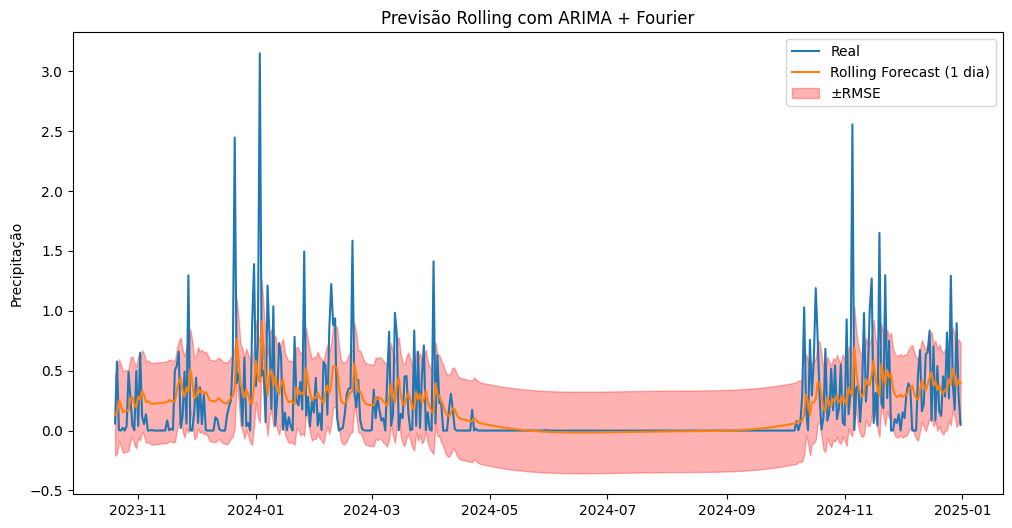

SMAPE: 144.32179371943533

Arquivo salvo com sucesso: /home/juliababa/tcc/src/forecast_arima_rolling_precipitacao.csv
         data  precipitacao_observada  precipitacao_prevista
0  2023-10-20                   0.059                  0.131
1  2023-10-21                   0.577                  0.147
2  2023-10-22                   0.004                  0.256
3  2023-10-23                   0.000                  0.213
4  2023-10-24                   0.022                  0.156


In [49]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parâmetros do modelo
seasonality = 365
num_fourier_terms = 4

# Função para criar os termos de Fourier
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

# Série completa: usar treino + teste para poder criar os índices de tempo
full_series = pd.concat([df_training, df_test])
full_index = full_series.index
full_values = full_series[forecast_parameter].values
n_train = len(df_training)
n_test = len(df_test)

# Inicializar listas de previsões e valores reais
forecast_rolling = []
actuals = []

# Rolling: prever 1 ponto por vez ao longo do período de teste
for i in range(n_test):
    # Janela de treino vai até o ponto atual
    end_idx = n_train + i
    train_series = full_values[:end_idx]
    t_train = np.arange(end_idx)
    t_forecast = np.array([end_idx])  # ponto seguinte
    
    # Fourier para treino e previsão
    fourier_train = create_fourier_terms(t_train, seasonality, num_fourier_terms)
    fourier_forecast = create_fourier_terms(t_forecast, seasonality, num_fourier_terms)
    
    try:
        model = ARIMA(train_series, exog=fourier_train, order=(3, 0, 1), trend='ct')
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1, exog=fourier_forecast)
        
        forecast_rolling.append(forecast[0])
        actuals.append(full_values[end_idx])
    except Exception as e:
        print(f"Erro na iteração {i}: {e}")
        forecast_rolling.append(np.nan)
        actuals.append(full_values[end_idx])

# Calcular RMSE
rmse = mean_squared_error(actuals, forecast_rolling, squared=False)
print(f"RMSE rolling 1 dia: {rmse:.3f}")

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, actuals, label='Real')
plt.plot(df_test.index, forecast_rolling, label='Rolling Forecast (1 dia)')
plt.fill_between(df_test.index,
                 np.array(forecast_rolling) - rmse,
                 np.array(forecast_rolling) + rmse,
                 alpha=0.3, color='red', label='±RMSE')
plt.legend()
plt.ylabel('Precipitação')
plt.title('Previsão Rolling com ARIMA + Fourier')
plt.show()

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(df_test[forecast_parameter], forecast_rolling)
print(f"SMAPE: {smape_value}")

# =======================================================
# EXPORTAR RESULTADOS PARA CSV PADRÃO
# =======================================================
import pathlib

# Montar DataFrame de saída
df_out = pd.DataFrame({
    "data": pd.to_datetime(df_test.index).strftime("%Y-%m-%d"),
    "precipitacao_observada": np.array(actuals),
    "precipitacao_prevista": np.array(forecast_rolling)
})

# Arredondar valores
df_out["precipitacao_observada"] = df_out["precipitacao_observada"].round(3)
df_out["precipitacao_prevista"] = df_out["precipitacao_prevista"].round(3)

# Salvar em CSV
saida = pathlib.Path("forecast_arima_rolling_precipitacao.csv")
df_out.to_csv(saida, sep=";", index=False, encoding="utf-8-sig")

print(f"\nArquivo salvo com sucesso: {saida.resolve()}")
print(df_out.head())

/home/juliababa/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


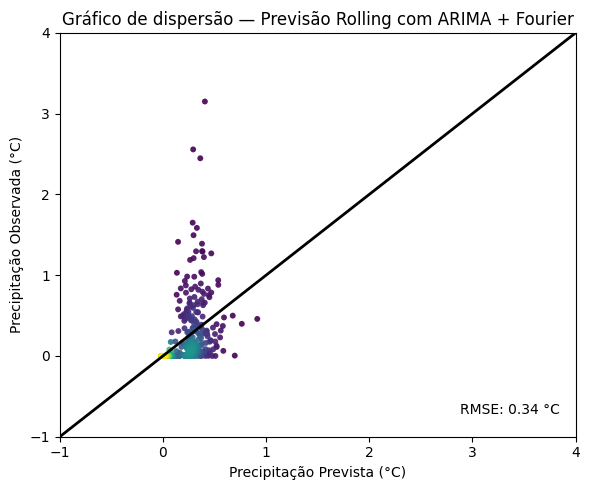

In [50]:
# ---------- PARITY PLOT (UMA estação) ----------
fig, ax = plt.subplots(figsize=(6,5))
get_forecast_test_graph(
    df_test=df_test,
    forecast=forecast_rolling,
    forecast_parameter=forecast_parameter,
    ax=ax,
    title=f"Gráfico de dispersão — Previsão Rolling com ARIMA + Fourier"
)
plt.tight_layout()
plt.show()

/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/juliababa/.local/lib/python3.10/site-packages/statsmodels/

[Rolling 1-step] RMSE bruto: 0.350 | RMSE calibrado: 0.352
[Rolling 1-step] sMAPE bruto: 144.84% | sMAPE calibrado: 145.12%


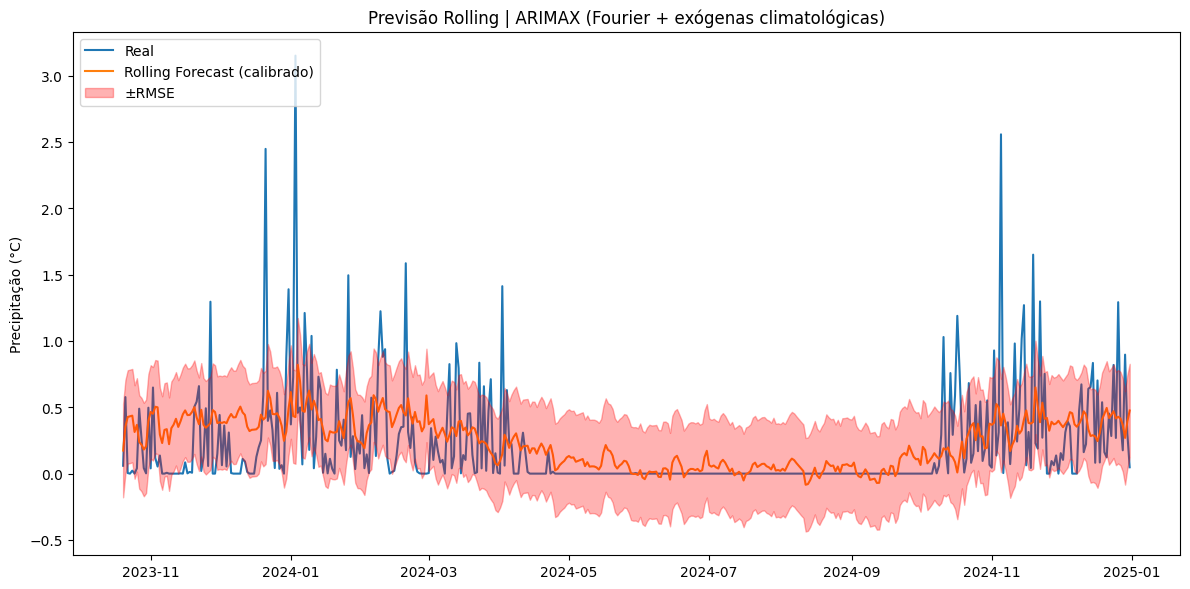

In [51]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# ===== utilitárias =====
def create_fourier_terms(t, period, num_terms):
    terms = []
    for i in range(1, num_terms + 1):
        terms.append(np.sin(2 * np.pi * i * t / period))
        terms.append(np.cos(2 * np.pi * i * t / period))
    return np.column_stack(terms)

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

# 👉 NOVA: exógenas climatológicas sem vazamento (histórico disponível)
def build_exog_for_index_no_leak(train_df, target_index, exog_vars):
    prof = train_df.copy()
    if len(prof) == 0:
        return pd.Series({v: np.nan for v in exog_vars}, name=target_index)

    mm, dd = target_index.month, target_index.day

    prof["__mm__"] = prof.index.month
    prof["__dd__"] = prof.index.day
    profile_mmdd = prof.groupby(["__mm__", "__dd__"])[exog_vars].mean()

    if (mm, dd) in profile_mmdd.index:
        return profile_mmdd.loc[(mm, dd)].rename(target_index)

    prof["__doy__"] = prof.index.dayofyear
    profile_doy = prof.groupby("__doy__")[exog_vars].mean()
    doy = ((target_index.dayofyear - 1) % 365) + 1
    if doy in profile_doy.index:
        return profile_doy.loc[doy].rename(target_index)

    return prof[exog_vars].mean().rename(target_index)

# 👉 ÚNICA versão de debias_with_calibration (sem .values em ndarray)
def debias_with_calibration(model_fit, df_training, forecast_parameter, X_train_final, forecast_vals, calib_days=60):
    n = len(df_training)
    start_i = max(0, n - calib_days)
    end_i   = n - 1

    pred_cal = model_fit.get_prediction(
        start=start_i,
        end=end_i,
        exog=X_train_final[start_i:]
    ).predicted_mean
    # pred_cal pode ser Series ou ndarray; padronize para ndarray
    pred_cal = np.asarray(pred_cal)

    y_cal = df_training[forecast_parameter].iloc[start_i:n].to_numpy()

    ME = (y_cal - pred_cal).mean()
    X = sm.add_constant(pred_cal)
    a, b = sm.OLS(y_cal, X).fit().params

    forecast_vals = np.asarray(forecast_vals)
    forecast_bias_fixed = forecast_vals + ME
    forecast_linear_cal = a + b * forecast_vals

    return {"ME": ME,
            "forecast_bias_fixed": forecast_bias_fixed,
            "a": a, "b": b,
            "forecast_linear_cal": forecast_linear_cal}

# ===== Rolling one-step-ahead =====
def arimax_fourier_rolling_one_step(
    df_training, df_test, forecast_parameter,
    order=(3,0,1), trend='ct',
    seasonality=365, num_fourier_terms=4,
    exog_vars =(
        "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
        "TEMPERATURA DO PONTO DE ORVALHO (°C)",
        "UMIDADE RELATIVA DO AR, HORARIA (%)"
    ),
    calib_days=60, use_linear_calibration=False, refit_every=1
):
    # sanity-check: colunas existem
    needed_cols = [forecast_parameter, *exog_vars]
    for col in needed_cols:
        if col not in df_training.columns or col not in df_test.columns:
            raise KeyError(f"Coluna ausente em training/test: {col}")

    # Série completa apenas para índice/ordenação
    full = pd.concat([df_training[needed_cols], df_test[needed_cols]], axis=0)
    n_train = len(df_training)
    n_test  = len(df_test)

    preds_raw, preds_cal, actuals = [], [], []

    for i in range(n_test):
        end_idx  = n_train + i
        train_df = full.iloc[:end_idx].copy()  # histórico disponível até t

        # y e exógenas do treino
        y_train = train_df[forecast_parameter].to_numpy()
        t_train = np.arange(end_idx)
        fourier_train = create_fourier_terms(t_train, seasonality, num_fourier_terms)

        X_train_extra = train_df[list(exog_vars)].to_numpy()
        X_train_final = np.hstack([X_train_extra, fourier_train])

        # exógenas do próximo passo (climatologia do que já existe)
        next_index = full.index[end_idx]
        exog_next_series = build_exog_for_index_no_leak(train_df.set_index(train_df.index),
                                                        next_index, list(exog_vars))
        X_next_extra = exog_next_series.to_numpy().reshape(1, -1)

        fourier_next = create_fourier_terms(np.array([end_idx]), seasonality, num_fourier_terms)
        X_next = np.hstack([X_next_extra, fourier_next])

        # ajuste (refit opcional)
        if (i % refit_every) == 0:
            model = ARIMA(y_train, exog=X_train_final, order=order, trend=trend)
            model_fit = model.fit()

        # previsão 1 passo à frente
        yhat_raw = model_fit.forecast(steps=1, exog=X_next)[0]
        preds_raw.append(yhat_raw)
        actuals.append(full[forecast_parameter].iloc[end_idx])

        # calibração opcional
        cal = debias_with_calibration(
            model_fit=model_fit,
            df_training=train_df,
            forecast_parameter=forecast_parameter,
            X_train_final=X_train_final,
            forecast_vals=np.array([yhat_raw]),
            calib_days=calib_days
        )
        yhat_corr = cal["forecast_linear_cal"][0] if use_linear_calibration else cal["forecast_bias_fixed"][0]
        preds_cal.append(yhat_corr)

    preds_raw = pd.Series(preds_raw, index=df_test.index, name="forecast_raw")
    preds_cal = pd.Series(preds_cal, index=df_test.index, name="forecast_calibrated")
    actuals   = pd.Series(actuals,   index=df_test.index, name="actual")

    rmse_raw = mean_squared_error(actuals, preds_raw, squared=False)
    rmse_cal = mean_squared_error(actuals, preds_cal, squared=False)
    smape_raw = smape(actuals, preds_raw)
    smape_cal = smape(actuals, preds_cal)

    print(f"[Rolling 1-step] RMSE bruto: {rmse_raw:.3f} | RMSE calibrado: {rmse_cal:.3f}")
    print(f"[Rolling 1-step] sMAPE bruto: {smape_raw:.2f}% | sMAPE calibrado: {smape_cal:.2f}%")

    plt.figure(figsize=(12,6))
    plt.plot(actuals.index, actuals.values, label='Real')
    plt.plot(preds_cal.index, preds_cal.values, label='Rolling Forecast (calibrado)')
    plt.fill_between(preds_cal.index,
                     preds_cal.values - rmse_cal,
                     preds_cal.values + rmse_cal,
                     alpha=0.30, color='red', zorder=20, label='±RMSE')
    plt.ylabel('Precipitação (°C)')
    plt.legend(loc='upper left')
    plt.title('Previsão Rolling | ARIMAX (Fourier + exógenas climatológicas)')
    plt.tight_layout()
    plt.show()

    return preds_cal

# ====== Exemplo de uso ======
forecast_parameter = 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'

rolling_forecast = arimax_fourier_rolling_one_step(
    df_training=df_training,
    df_test=df_test,
    forecast_parameter=forecast_parameter,
    order=(3,0,1),
    trend='ct',
    seasonality=365,
    num_fourier_terms=4,
    exog_vars=(
        "VENTO, DIREÇÃO HORARIA (gr) (° (gr))",
        "TEMPERATURA DO PONTO DE ORVALHO (°C)",
        "UMIDADE RELATIVA DO AR, HORARIA (%)"
    ),
    calib_days=60,
    use_linear_calibration=False,  # True para (a + b*yhat); False para apenas viés (ME)
    refit_every=1                  # aumente (ex.: 7) para acelerar
)


/home/juliababa/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


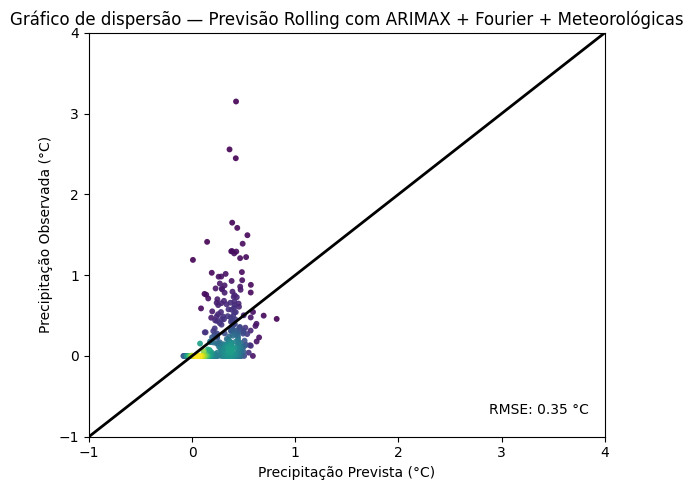

In [52]:
# ---------- PARITY PLOT (UMA estação) ----------
fig, ax = plt.subplots(figsize=(6,5))
get_forecast_test_graph(
    df_test=df_test,
    forecast=rolling_forecast,
    forecast_parameter=forecast_parameter,
    ax=ax,
    title=f"Gráfico de dispersão — Previsão Rolling com ARIMAX + Fourier + Meteorológicas"
)
plt.tight_layout()
plt.show()